In [2]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 95.2 MB/s eta 0:00:00


# Ejercicio Guía 2.2
Un fraccionador de whisky importa el licor en tres distintas graduaciones A, B y C.
Mediante la mezcla de estos licores, de acuerdo a sus fórmulas, se obtienen los whiskies de calidades
comercializables Escocés, Kilt y Tartan.
Las citadas fórmulas especifican las siguientes relaciones entre los elementos a mezclar.

## 🥃 Especificaciones de Mezcla por Marca de Whisky

| Marca   | Restricciones de Mezcla         | Precio de Venta ($/litro) |
|---------|----------------------------------|----------------------------|
| Escocés | ≥ 60% de A, ≤ 20% de C          | 6.80                       |
| Kilt    | ≥ 15% de A, ≤ 60% de C          | 5.70                       |
| Tartan  | ≤ 50% de C                      | 4.50                       |

---

## 🧪 Disponibilidad y Costo de los Licores

| Tipo de Licor | Litros Disponibles | Costo ($/litro) |
|---------------|--------------------|------------------|
| A             | 2000               | 7.00             |
| B             | 2500               | 5.00             |
| C             | 1200               | 4.00             |

---

## Objetivo

Determinar la composición óptima de cada marca de whisky para **maximizar el beneficio total**, considerando:

- El precio de venta de cada marca.
- El costo por litro de cada tipo de licor.
- Las restricciones de mezcla establecidas por cada fórmula.
- La disponibilidad limitada de insumos.

In [ ]:
import pulp
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Crear modelo
model = pulp.LpProblem("Mezcla_de_Whisky", pulp.LpMaximize)

In [ ]:
# Definición de variables
tipos = ['A', 'B', 'C']
marcas = ['E', 'K', 'T'] # Escocés, Kilt, Tartan
vars = pulp.LpVariable.dicts("Litros", [(m, t) for m in marcas for t in tipos], lowBound=0) # forma compacta de definir variables

In [ ]:
# Beneficio
beneficio = {
    ('E', 'A'): -0.20, ('E', 'B'): 1.80, ('E', 'C'): 2.80,
    ('K', 'A'): -1.30, ('K', 'B'): 0.70, ('K', 'C'): 1.70,
    ('T', 'A'): -2.50, ('T', 'B'): -0.50, ('T', 'C'): 0.50
}

Ganancia total: $3988.89


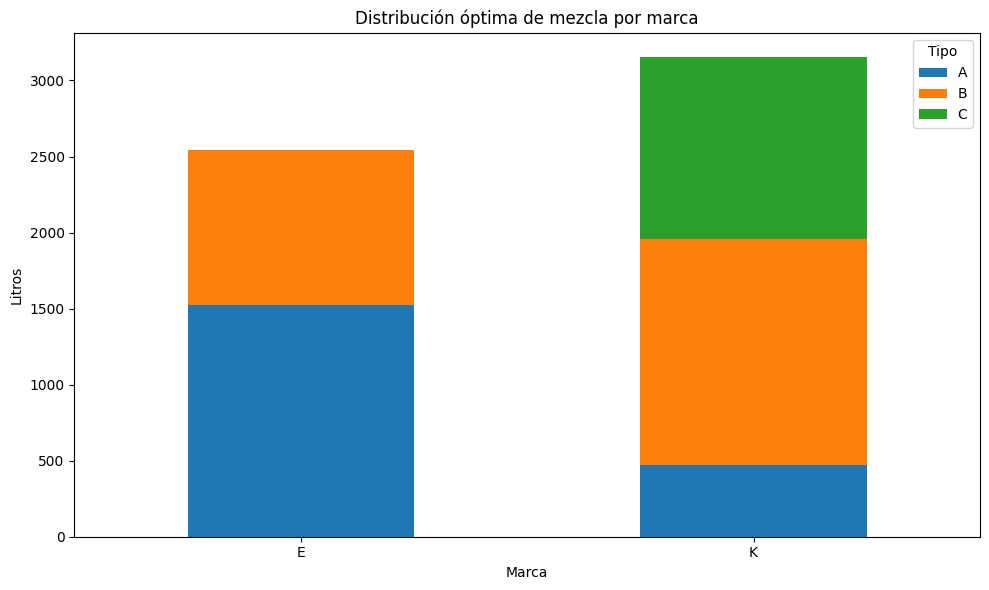


Análisis de sensibilidad:
Restricción  Shadow Price         Slack
        _C1      0.777778 -0.000000e+00
        _C2      0.333333 -0.000000e+00
        _C3      1.333333 -0.000000e+00
        _C4     -2.444444  5.703479e-13
        _C5     -0.000000  5.088889e+02
        _C6     -2.444444  5.131424e-13
        _C7     -0.000000  6.933333e+02
        _C8     -0.000000 -0.000000e+00


In [ ]:
model += pulp.lpSum(beneficio[(m, t)] * vars[(m, t)] for m in marcas for t in tipos)

# Restricciones de disponibilidad
model += vars[('E', 'A')] + vars[('K', 'A')] + vars[('T', 'A')] <= 2000
model += vars[('E', 'B')] + vars[('K', 'B')] + vars[('T', 'B')] <= 2500
model += vars[('E', 'C')] + vars[('K', 'C')] + vars[('T', 'C')] <= 1200

# Restricciones de mezcla
EA, EB, EC = vars[('E', 'A')], vars[('E', 'B')], vars[('E', 'C')]
KA, KB, KC = vars[('K', 'A')], vars[('K', 'B')], vars[('K', 'C')]
TA, TB, TC = vars[('T', 'A')], vars[('T', 'B')], vars[('T', 'C')]

model += EA >= 0.6 * (EA + EB + EC)
model += EC <= 0.2 * (EA + EB + EC)
model += KA >= 0.15 * (KA + KB + KC)
model += KC <= 0.6 * (KA + KB + KC)
model += TC <= 0.5 * (TA + TB + TC)

# Resolver
model.solve()

# Resultados
print(f"Ganancia total: ${pulp.value(model.objective):.2f}")

results = []
for m in marcas:
    for t in tipos:
        litros = vars[(m, t)].varValue
        if litros > 0:
            results.append({'Marca': m, 'Tipo': t, 'Litros': litros})

df = pd.DataFrame(results)
pivot = df.pivot(index='Marca', columns='Tipo', values='Litros').fillna(0)

# Gráfico
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribución óptima de mezcla por marca")
plt.ylabel("Litros")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis de sensibilidad
sens_df = pd.DataFrame([
    {"Restricción": name, "Shadow Price": c.pi, "Slack": c.slack}
    for name, c in model.constraints.items()
])
print("\nAnálisis de sensibilidad:")
print(sens_df.to_string(index=False))

In [ ]:
import pulp

# Solución 2

Desarrollada con detalle.

Solución alternativa con variables totalizadoras: https://colab.research.google.com/drive/1QtTFoEEKZ6yL4SAwh97LCizzTwCBACiE#scrollTo=HP-Bzud2JYMg

In [19]:
"""
Problema de Programación Lineal - Mezcla de Whiskies
Resolver usando PuLP para maximizar beneficios
"""

# Crear el problema de maximización
prob = pulp.LpProblem("Mezcla_Whiskies", pulp.LpMaximize)

In [27]:
# Variables de decisión >=0
# x_ij = litros del licor i (A, B, C) usados en la marca j (Escocés, Kilt, Tartan)
x_AE = pulp.LpVariable("x_A_Escoces", lowBound=0)
x_BE = pulp.LpVariable("x_B_Escoces", lowBound=0)
x_CE = pulp.LpVariable("x_C_Escoces", lowBound=0)

x_AK = pulp.LpVariable("x_A_Kilt", lowBound=0)
x_BK = pulp.LpVariable("x_B_Kilt", lowBound=0)
x_CK = pulp.LpVariable("x_C_Kilt", lowBound=0)

x_AT = pulp.LpVariable("x_A_Tartan", lowBound=0)
x_BT = pulp.LpVariable("x_B_Tartan", lowBound=0)
x_CT = pulp.LpVariable("x_C_Tartan", lowBound=0)

In [28]:
# Datos del problema
precio_venta = {
    'Escoces': 6.80,
    'Kilt': 5.70,
    'Tartan': 4.50
}

precio_costo = {
    'A': 7.00,
    'B': 5.00,
    'C': 4.00
}

disponibilidad = {
    'A': 2000,
    'B': 2500,
    'C': 1200
}

In [29]:
# Función objetivo: Maximizar beneficios
# Beneficio = Ingresos por ventas - Costos de materias primas
prob += (
    # Ingresos por Escocés
    precio_venta['Escoces'] * (x_AE + x_BE + x_CE) -
    # Costos del Escocés
    (precio_costo['A'] * x_AE + precio_costo['B'] * x_BE + precio_costo['C'] * x_CE) +

    # Ingresos por Kilt
    precio_venta['Kilt'] * (x_AK + x_BK + x_CK) -
    # Costos del Kilt
    (precio_costo['A'] * x_AK + precio_costo['B'] * x_BK + precio_costo['C'] * x_CK) +

    # Ingresos por Tartan
    precio_venta['Tartan'] * (x_AT + x_BT + x_CT) -
    # Costos del Tartan
    (precio_costo['A'] * x_AT + precio_costo['B'] * x_BT + precio_costo['C'] * x_CT)
), "Beneficio_Total"

In [24]:
# Restricciones de disponibilidad
prob += x_AE + x_AK + x_AT <= disponibilidad['A'], "Disponibilidad_A"
prob += x_BE + x_BK + x_BT <= disponibilidad['B'], "Disponibilidad_B"
prob += x_CE + x_CK + x_CT <= disponibilidad['C'], "Disponibilidad_C"

# Restricciones de composición para Escocés
# No menos del 60% de A
prob += x_AE >= 0.60 * (x_AE + x_BE + x_CE), "Escoces_min_A"
# No más del 20% de C
prob += x_CE <= 0.20 * (x_AE + x_BE + x_CE), "Escoces_max_C"

# Restricciones de composición para Kilt
# No menos del 15% de A
prob += x_AK >= 0.15 * (x_AK + x_BK + x_CK), "Kilt_min_A"
# No más del 60% de C
prob += x_CK <= 0.60 * (x_AK + x_BK + x_CK), "Kilt_max_C"

# Restricciones de composición para Tartan
# No más del 50% de C
prob += x_CT <= 0.50 * (x_AT + x_BT + x_CT), "Tartan_max_C"

In [25]:
# Resolver el problema
prob.solve()

1

In [26]:
# Mostrar resultados
print("=" * 60)
print("SOLUCIÓN ÓPTIMA DEL PROBLEMA DE MEZCLA DE WHISKIES")
print("=" * 60)
print(f"\nEstado: {pulp.LpStatus[prob.status]}")
print(f"Beneficio Total Máximo: ${pulp.value(prob.objective):.2f}")

print("\n" + "=" * 60)
print("COMPOSICIÓN ÓPTIMA DE CADA MARCA (en litros):")
print("=" * 60)

# Escocés
total_escoces = x_AE.varValue + x_BE.varValue + x_CE.varValue
print(f"\nESCOCÉS (Total: {total_escoces:.2f} litros):")
if total_escoces > 0:
    print(f"  Licor A: {x_AE.varValue:.2f} litros ({x_AE.varValue/total_escoces*100:.1f}%)")
    print(f"  Licor B: {x_BE.varValue:.2f} litros ({x_BE.varValue/total_escoces*100:.1f}%)")
    print(f"  Licor C: {x_CE.varValue:.2f} litros ({x_CE.varValue/total_escoces*100:.1f}%)")
else:
    print("  No se produce Escocés en la solución óptima")

# Kilt
total_kilt = x_AK.varValue + x_BK.varValue + x_CK.varValue
print(f"\nKILT (Total: {total_kilt:.2f} litros):")
if total_kilt > 0:
    print(f"  Licor A: {x_AK.varValue:.2f} litros ({x_AK.varValue/total_kilt*100:.1f}%)")
    print(f"  Licor B: {x_BK.varValue:.2f} litros ({x_BK.varValue/total_kilt*100:.1f}%)")
    print(f"  Licor C: {x_CK.varValue:.2f} litros ({x_CK.varValue/total_kilt*100:.1f}%)")
else:
    print("  No se produce Kilt en la solución óptima")

# Tartan
total_tartan = x_AT.varValue + x_BT.varValue + x_CT.varValue
print(f"\nTARTAN (Total: {total_tartan:.2f} litros):")
if total_tartan > 0:
    print(f"  Licor A: {x_AT.varValue:.2f} litros ({x_AT.varValue/total_tartan*100:.1f}%)")
    print(f"  Licor B: {x_BT.varValue:.2f} litros ({x_BT.varValue/total_tartan*100:.1f}%)")
    print(f"  Licor C: {x_CT.varValue:.2f} litros ({x_CT.varValue/total_tartan*100:.1f}%)")
else:
    print("  No se produce Tartan en la solución óptima")

# Uso de recursos
print("\n" + "=" * 60)
print("USO DE RECURSOS:")
print("=" * 60)
uso_A = x_AE.varValue + x_AK.varValue + x_AT.varValue
uso_B = x_BE.varValue + x_BK.varValue + x_BT.varValue
uso_C = x_CE.varValue + x_CK.varValue + x_CT.varValue

print(f"\nLicor A: {uso_A:.2f} / {disponibilidad['A']} litros ({uso_A/disponibilidad['A']*100:.1f}% utilizado)")
print(f"Licor B: {uso_B:.2f} / {disponibilidad['B']} litros ({uso_B/disponibilidad['B']*100:.1f}% utilizado)")
print(f"Licor C: {uso_C:.2f} / {disponibilidad['C']} litros ({uso_C/disponibilidad['C']*100:.1f}% utilizado)")

# Análisis económico
print("\n" + "=" * 60)
print("ANÁLISIS ECONÓMICO:")
print("=" * 60)

# Escocés
if total_escoces > 0:
    ingreso_escoces = precio_venta['Escoces'] * total_escoces
    costo_escoces = (precio_costo['A'] * x_AE.varValue +
                      precio_costo['B'] * x_BE.varValue +
                      precio_costo['C'] * x_CE.varValue)
    beneficio_escoces = ingreso_escoces - costo_escoces

    print(f"\nESCOCÉS:")
    print(f"  Ingreso: ${ingreso_escoces:.2f}")
    print(f"  Costo: ${costo_escoces:.2f}")
    print(f"  Beneficio: ${beneficio_escoces:.2f}")
    print(f"  Margen: {beneficio_escoces/ingreso_escoces*100:.1f}%")
else:
    print(f"\nESCOCÉS: No se produce")
    ingreso_escoces = costo_escoces = beneficio_escoces = 0

# Kilt
if total_kilt > 0:
    ingreso_kilt = precio_venta['Kilt'] * total_kilt
    costo_kilt = (precio_costo['A'] * x_AK.varValue +
                  precio_costo['B'] * x_BK.varValue +
                  precio_costo['C'] * x_CK.varValue)
    beneficio_kilt = ingreso_kilt - costo_kilt

    print(f"\nKILT:")
    print(f"  Ingreso: ${ingreso_kilt:.2f}")
    print(f"  Costo: ${costo_kilt:.2f}")
    print(f"  Beneficio: ${beneficio_kilt:.2f}")
    print(f"  Margen: {beneficio_kilt/ingreso_kilt*100:.1f}%")
else:
    print(f"\nKILT: No se produce")
    ingreso_kilt = costo_kilt = beneficio_kilt = 0

# Tartan
if total_tartan > 0:
    ingreso_tartan = precio_venta['Tartan'] * total_tartan
    costo_tartan = (precio_costo['A'] * x_AT.varValue +
                    precio_costo['B'] * x_BT.varValue +
                    precio_costo['C'] * x_CT.varValue)
    beneficio_tartan = ingreso_tartan - costo_tartan

    print(f"\nTARTAN:")
    print(f"  Ingreso: ${ingreso_tartan:.2f}")
    print(f"  Costo: ${costo_tartan:.2f}")
    print(f"  Beneficio: ${beneficio_tartan:.2f}")
    print(f"  Margen: {beneficio_tartan/ingreso_tartan*100:.1f}%")
else:
    print(f"\nTARTAN: No se produce - no es rentable en la solución óptima")
    ingreso_tartan = costo_tartan = beneficio_tartan = 0

# Totales
print(f"\nTOTALES:")
print(f"  Ingreso Total: ${ingreso_escoces + ingreso_kilt + ingreso_tartan:.2f}")
print(f"  Costo Total: ${costo_escoces + costo_kilt + costo_tartan:.2f}")
print(f"  Beneficio Total: ${beneficio_escoces + beneficio_kilt + beneficio_tartan:.2f}")

# Verificación de restricciones
print("\n" + "=" * 60)
print("VERIFICACIÓN DE RESTRICCIONES:")
print("=" * 60)

if total_escoces > 0:
    print("\nESCOCÉS:")
    pct_A_escoces = x_AE.varValue/total_escoces*100
    pct_C_escoces = x_CE.varValue/total_escoces*100
    print(f"  % de A: {pct_A_escoces:.1f}% (mínimo 60%) {'✓' if pct_A_escoces >= 59.9 else '✗'}")
    print(f"  % de C: {pct_C_escoces:.1f}% (máximo 20%) {'✓' if pct_C_escoces <= 20.1 else '✗'}")
else:
    print("\nESCOCÉS: No se produce - restricciones no aplican")

if total_kilt > 0:
    print("\nKILT:")
    pct_A_kilt = x_AK.varValue/total_kilt*100
    pct_C_kilt = x_CK.varValue/total_kilt*100
    print(f"  % de A: {pct_A_kilt:.1f}% (mínimo 15%) {'✓' if pct_A_kilt >= 14.9 else '✗'}")
    print(f"  % de C: {pct_C_kilt:.1f}% (máximo 60%) {'✓' if pct_C_kilt <= 60.1 else '✗'}")
else:
    print("\nKILT: No se produce - restricciones no aplican")

if total_tartan > 0:
    print("\nTARTAN:")
    pct_C_tartan = x_CT.varValue/total_tartan*100
    print(f"  % de C: {pct_C_tartan:.1f}% (máximo 50%) {'✓' if pct_C_tartan <= 50.1 else '✗'}")
else:
    print("\nTARTAN: No se produce - restricción no aplica")

# Análisis de la solución
print("\n" + "=" * 60)
print("ANÁLISIS DE LA SOLUCIÓN:")
print("=" * 60)

print("\n¿Por qué esta es la solución óptima?")
print("-" * 40)

if total_tartan == 0:
    print("\n1. NO se produce TARTAN porque:")
    print("   - Tiene el precio de venta más bajo ($4.50/litro)")
    print("   - Su margen de beneficio es inferior al de otras marcas")
    print("   - Es más rentable usar los recursos en Escocés y Kilt")

if total_escoces > 0:
    print("\n2. ESCOCÉS se produce al máximo rentable:")
    print(f"   - Usa exactamente el 60% mínimo de A (licor caro)")
    print(f"   - No usa nada de C (maximiza calidad al precio más alto)")
    print(f"   - Precio de venta: $6.80/litro (el más alto)")

if total_kilt > 0:
    print("\n3. KILT aprovecha el licor C disponible:")
    print(f"   - Usa todo el licor C disponible ({uso_C:.0f} litros)")
    print(f"   - Mantiene el mínimo de A requerido (15%)")
    print(f"   - Precio intermedio pero buen volumen de producción")

print("\n4. Uso eficiente de recursos:")
print(f"   - Licor A (caro): {uso_A/disponibilidad['A']*100:.1f}% usado")
print(f"   - Licor B (intermedio): {uso_B/disponibilidad['B']*100:.1f}% usado")
print(f"   - Licor C (barato): {uso_C/disponibilidad['C']*100:.1f}% usado")

SOLUCIÓN ÓPTIMA DEL PROBLEMA DE MEZCLA DE WHISKIES

Estado: Optimal
Beneficio Total Máximo: $3988.89

COMPOSICIÓN ÓPTIMA DE CADA MARCA (en litros):

ESCOCÉS (Total: 2544.44 litros):
  Licor A: 1526.67 litros (60.0%)
  Licor B: 1017.78 litros (40.0%)
  Licor C: 0.00 litros (0.0%)

KILT (Total: 3155.56 litros):
  Licor A: 473.33 litros (15.0%)
  Licor B: 1482.22 litros (47.0%)
  Licor C: 1200.00 litros (38.0%)

TARTAN (Total: 0.00 litros):
  No se produce Tartan en la solución óptima

USO DE RECURSOS:

Licor A: 2000.00 / 2000 litros (100.0% utilizado)
Licor B: 2500.00 / 2500 litros (100.0% utilizado)
Licor C: 1200.00 / 1200 litros (100.0% utilizado)

ANÁLISIS ECONÓMICO:

ESCOCÉS:
  Ingreso: $17302.22
  Costo: $15775.56
  Beneficio: $1526.67
  Margen: 8.8%

KILT:
  Ingreso: $17986.67
  Costo: $15524.44
  Beneficio: $2462.22
  Margen: 13.7%

TARTAN: No se produce - no es rentable en la solución óptima

TOTALES:
  Ingreso Total: $35288.89
  Costo Total: $31300.00
  Beneficio Total: $3988.89